In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv(r'c:\Users\91843\Desktop\Alfido tech internship\Task 1\zomato.csv')

In [4]:
df

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56247,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars
56248,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars
56249,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars
56250,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars


In [5]:
# Load the dataset
df = pd.read_csv(r'c:\Users\91843\Desktop\Alfido tech internship\Task 1\zomato.csv')

# --- Data Cleaning and Preprocessing ---

# 1. Drop unnecessary columns
df.drop(['address', 'phone'], axis=1, inplace=True)

# 2. Rename columns for better readability
df.rename(columns={'approx_cost(for two people)': 'cost_for_two', 'listed_in(type)': 'service_type'}, inplace=True)

# 4. Clean the 'rate' column (remove '/5' and convert to float)
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0].strip())
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# 3. Handle missing values
df['rate'].fillna(df['rate'].mean(), inplace=True)
df.dropna(subset=['name', 'online_order', 'book_table', 'location', 'rest_type', 'cuisines', 'cost_for_two', 'service_type'], inplace=True)


# 5. Clean the 'cost_for_two' column (remove commas and convert to float)
df['cost_for_two'] = df['cost_for_two'].astype(str).apply(lambda x: x.replace(',', ''))
df['cost_for_two'] = pd.to_numeric(df['cost_for_two'], errors='coerce')
df.dropna(subset=['cost_for_two'], inplace=True)

C:\Users\91843\AppData\Local\Temp\ipykernel_11896\774279294.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(df['rate'].mean(), inplace=True)


In [6]:
# --- Initial Exploration ---
print(df.head())
print(df.info())
print(df.describe())

                    name online_order book_table  rate votes      location  \
0                  Jalsa          Yes        Yes   4.1   775  Banashankari   
1         Spice Elephant          Yes         No   4.1   787  Banashankari   
2        San Churro Cafe          Yes         No   3.8   918  Banashankari   
3  Addhuri Udupi Bhojana           No         No   3.7    88  Banashankari   
4          Grand Village           No         No   3.8   166  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   

                         cuisines  cost_for_two service_type  
0  No

Text(0.5, 1.0, 'Distribution of Online Orders')

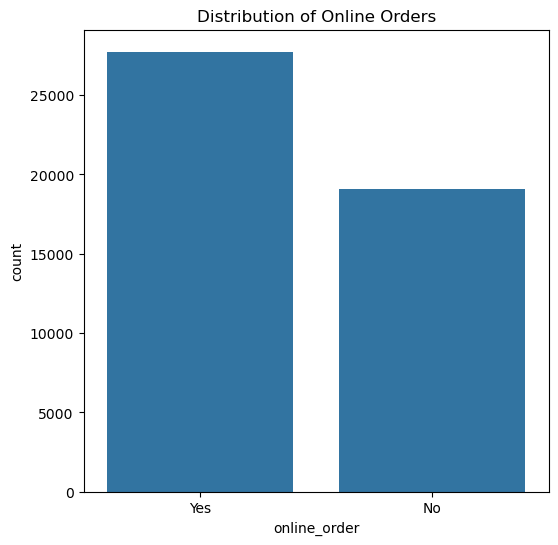

In [7]:
# 1. Online Order Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='online_order', data=df)
plt.title('Distribution of Online Orders')

Text(0.5, 1.0, 'Distribution of Table Bookings')

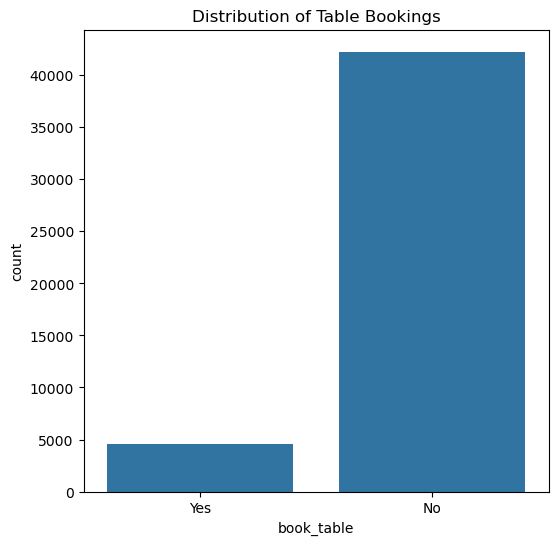

In [8]:
# 2. Table Booking Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='book_table', data=df)
plt.title('Distribution of Table Bookings')

Text(0.5, 1.0, 'Distribution of Restaurant Ratings')

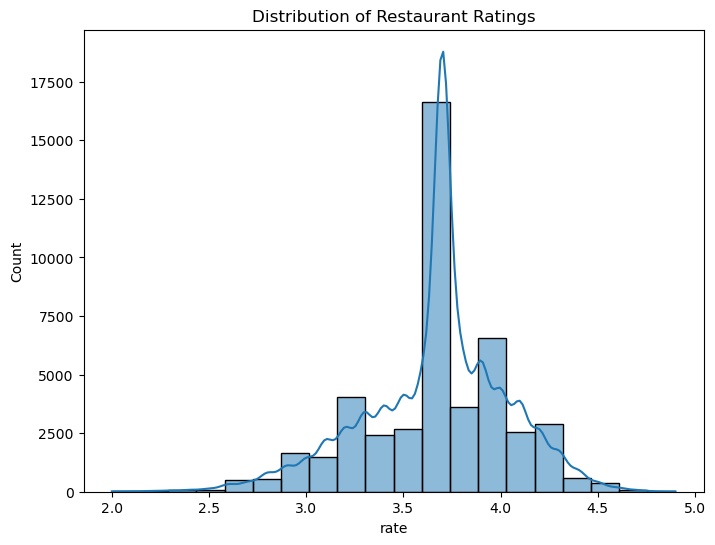

In [9]:
# 3. Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['rate'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'BTM'),
  Text(1, 0, 'HSR'),
  Text(2, 0, 'JP Nagar'),
  Text(3, 0, 'Koramangala 5th Block'),
  Text(4, 0, 'Whitefield'),
  Text(5, 0, 'Jayanagar'),
  Text(6, 0, 'Indiranagar'),
  Text(7, 0, 'Marathahalli'),
  Text(8, 0, 'Bannerghatta Road'),
  Text(9, 0, 'Electronic City')])

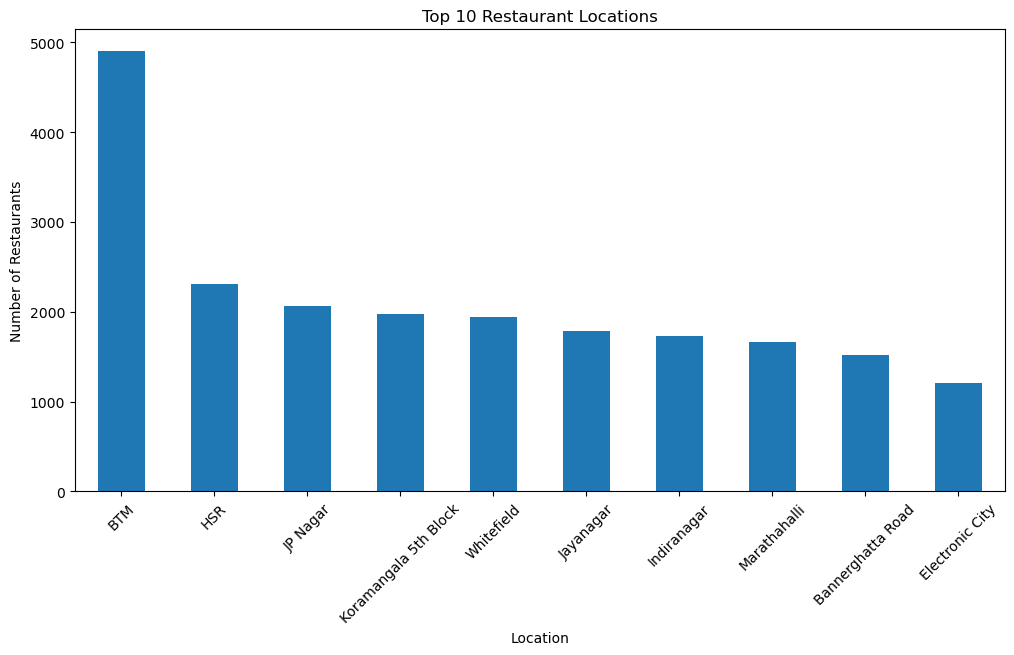

In [10]:
# 4. Top 10 Locations
plt.figure(figsize=(12, 6))
df['location'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Restaurant Locations')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'Biryani'),
  Text(4, 0, 'Bakery, Desserts'),
  Text(5, 0, 'Fast Food'),
  Text(6, 0, 'Desserts'),
  Text(7, 0, 'South Indian, North Indian, Chinese'),
  Text(8, 0, 'Cafe'),
  Text(9, 0, 'Bakery')])

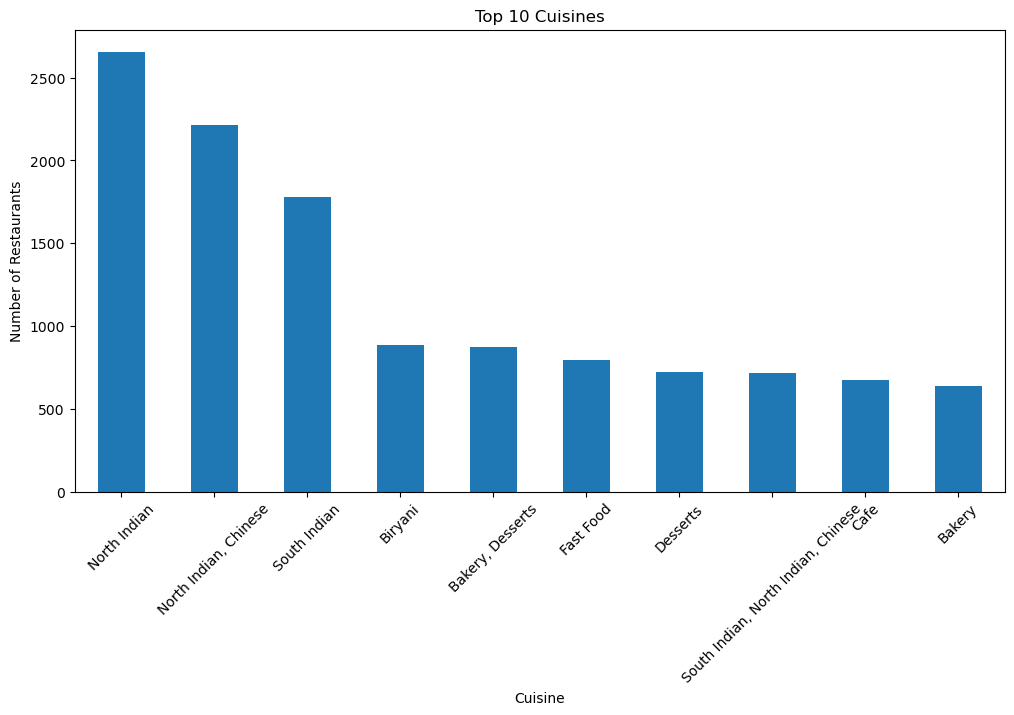

In [11]:
# 5. Top 10 Cuisines
plt.figure(figsize=(12, 6))
df['cuisines'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Rating vs. Cost for Two People')

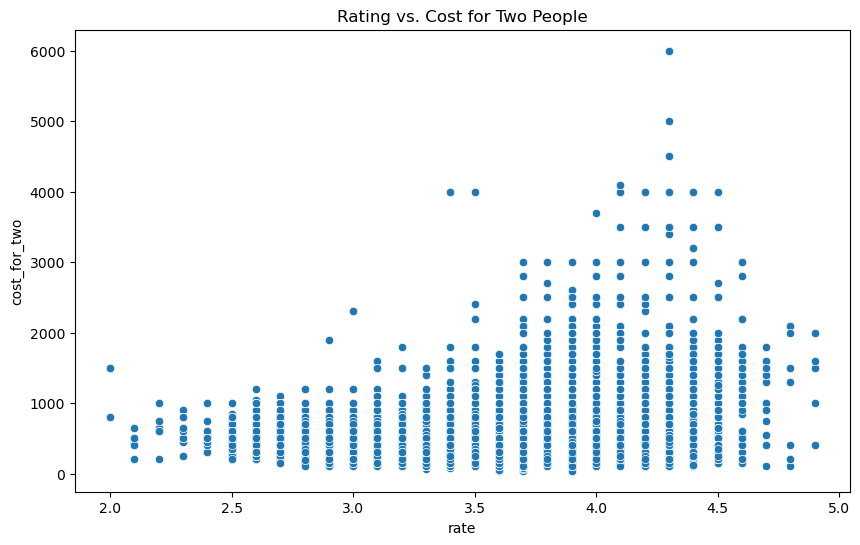

In [12]:
# 6. Rating vs. Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rate', y='cost_for_two', data=df)
plt.title('Rating vs. Cost for Two People')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Buffet'),
  Text(1, 0, 'Cafes'),
  Text(2, 0, 'Delivery'),
  Text(3, 0, 'Desserts'),
  Text(4, 0, 'Dine-out'),
  Text(5, 0, 'Drinks & nightlife'),
  Text(6, 0, 'Pubs and bars')])

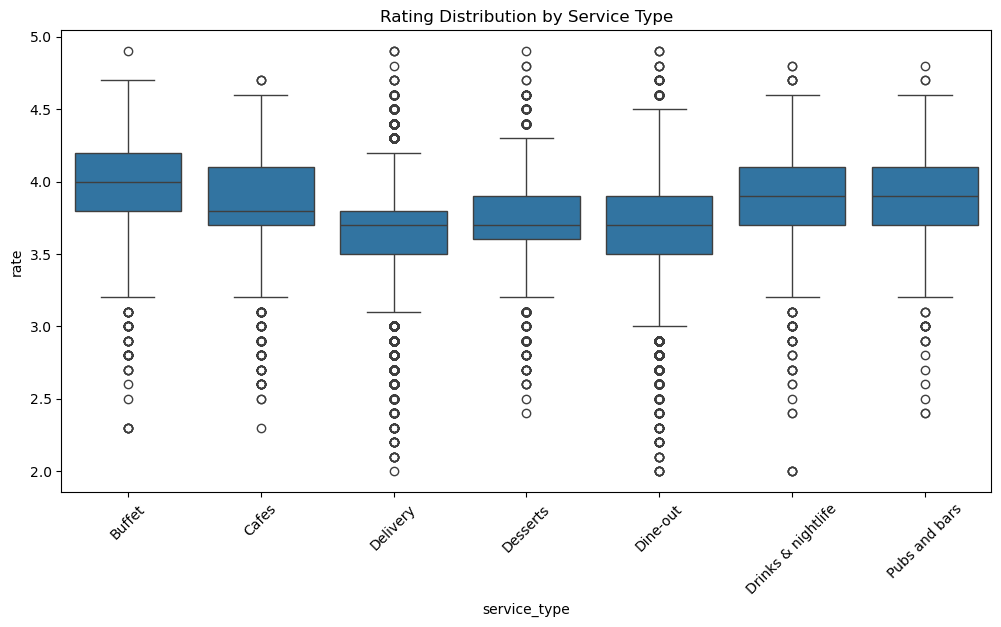

In [13]:
# 7. Rating Distribution by Service Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='service_type', y='rate', data=df)
plt.title('Rating Distribution by Service Type')
plt.xticks(rotation=45)